In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer

In [ ]:
dataset = pd.read_csv("../dataset/movies.csv")
dataset.head()

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime,Gross
0,Blood Red Sky,(2021),"\nAction, Horror, Thriller",6.1,\nA woman with a mysterious illness is forced ...,\n Director:\nPeter Thorwarth\n| \n Star...,"21,062",121.0,NaN
1,Masters of the Universe: Revelation,(2021– ),"\nAnimation, Action, Adventure",5.0,\nThe war for Eternia begins again in what may...,"\n \n Stars:\nChris Wood, \nSara...","17,870",25.0,NaN
2,The Walking Dead,(2010–2022),"\nDrama, Horror, Thriller",8.2,\nSheriff Deputy Rick Grimes wakes up from a c...,"\n \n Stars:\nAndrew Lincoln, \n...","885,805",44.0,NaN
3,Rick and Morty,(2013– ),"\nAnimation, Adventure, Comedy",9.2,\nAn animated series that follows the exploits...,"\n \n Stars:\nJustin Roiland, \n...","414,849",23.0,NaN
4,Army of Thieves,(2021),"\nAction, Crime, Horror",NaN,"\nA prequel, set before the events of Army of ...",\n Director:\nMatthias Schweighöfer\n| \n ...,NaN,NaN,NaN


In [9]:
dataset.describe()

,RATING,RunTime
count,8179.000000,7041.000000
mean,6.921176,68.688539
std,1.220232,47.258056
min,1.100000,1.000000
25%,6.200000,36.000000
50%,7.100000,60.000000
75%,7.800000,95.000000
max,9.900000,853.000000


In [10]:
dataset.isnull().sum()

MOVIES         0
YEAR         644
GENRE         80
RATING      1820
ONE-LINE       0
STARS          0
VOTES       1820
RunTime     2958
Gross       9539
dtype: int64

In [11]:
se = SimpleImputer(strategy='mean')
dataset[['RunTime']] = se.fit_transform(dataset[['RunTime']])

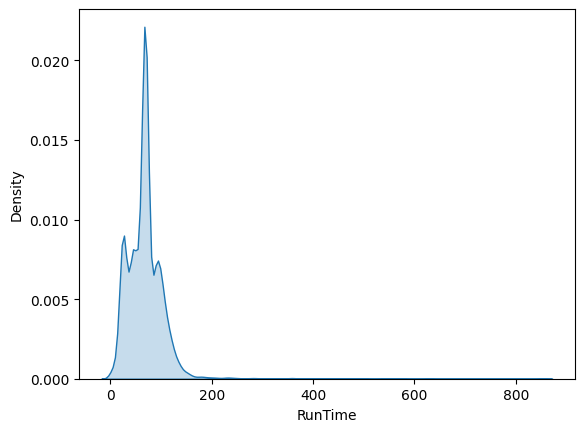

In [21]:
# sns.histplot(dataset['RunTime'], kde=True)
sns.kdeplot(dataset['RunTime'], fill=True)
plt.show()

In [13]:
#direct method
min_range = (dataset['RunTime'].mean()) - (3*dataset['RunTime'].std())
max_range = (dataset['RunTime'].mean()) + (3*dataset['RunTime'].std())

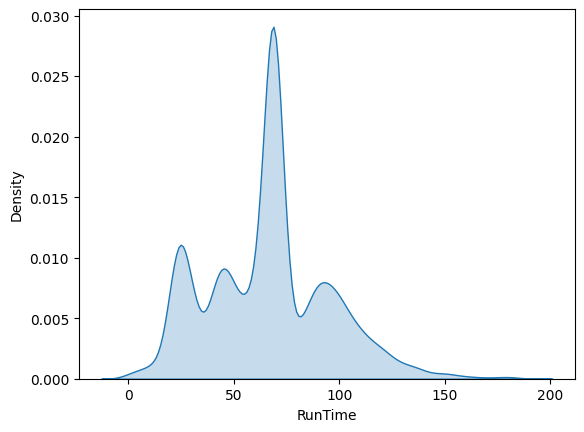

In [22]:
new = dataset[dataset['RunTime']<=max_range]
sns.kdeplot(new['RunTime'], fill=True)
plt.show()

In [15]:
#z score method
z_score = (dataset['RunTime']-dataset['RunTime'].mean())/dataset['RunTime'].std()

In [16]:
dataset['z_score'] = z_score
dataset.head()

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime,Gross,z_score
0,Blood Red Sky,(2021),"\nAction, Horror, Thriller",6.1,\nA woman with a mysterious illness is forced ...,\n Director:\nPeter Thorwarth\n| \n Star...,"21,062",121.000000,NaN,1.319141e+00
1,Masters of the Universe: Revelation,(2021– ),"\nAnimation, Action, Adventure",5.0,\nThe war for Eternia begins again in what may...,"\n \n Stars:\nChris Wood, \nSara...","17,870",25.000000,NaN,-1.101696e+00
2,The Walking Dead,(2010–2022),"\nDrama, Horror, Thriller",8.2,\nSheriff Deputy Rick Grimes wakes up from a c...,"\n \n Stars:\nAndrew Lincoln, \n...","885,805",44.000000,NaN,-6.225723e-01
3,Rick and Morty,(2013– ),"\nAnimation, Adventure, Comedy",9.2,\nAn animated series that follows the exploits...,"\n \n Stars:\nJustin Roiland, \n...","414,849",23.000000,NaN,-1.152130e+00
4,Army of Thieves,(2021),"\nAction, Crime, Horror",NaN,"\nA prequel, set before the events of Army of ...",\n Director:\nMatthias Schweighöfer\n| \n ...,NaN,68.688539,NaN,-3.583559e-16


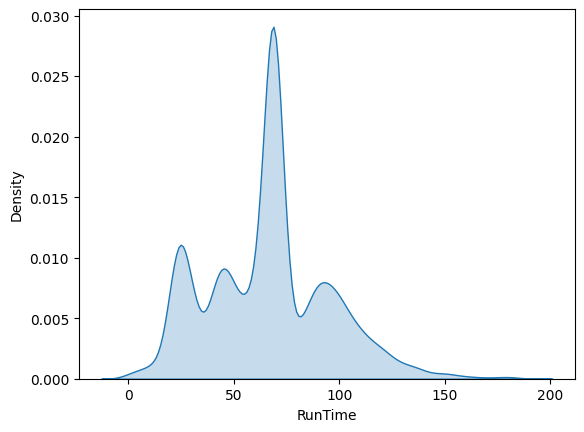

In [23]:
new_dataset = dataset[dataset['z_score']<3]
sns.kdeplot(new_dataset['RunTime'], fill=True)
plt.show()